In [ ]:
# This study aimed to identify if a patient will die or not due to head and neck cancer according to the dataset obtained from the website http://www.cbioportal.org/study/summary?id=hnsc_tcga, applying Classification Models in Machine Learning.
# The request was done by Dr. Sabrina Daniela Silva Wurzba, DDS, MSc, Ph.D. from the Department of Otolaryngology-Head and Neck Surgery Faculty of Medicine - McGill University, Montreal, Canada.

# Reading dataset
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 220)
pd.set_option('display.max_rows', 527)

file = pd.read_excel('Head_and_Neck_TCGA_Sabrina.xlsx')
file.head()

In [4]:
# Checking the number of rows and columns that the dataset has.
file.shape

(527, 71)

In [5]:
# Checking the missing data
missing_data = file.isnull().sum()
percetage_missing_data = (missing_data / len(file['PRIMARY_SITE']))*100
percetage_missing_data

OTHER_PATIENT_ID                             0.000000
PATIENT_ID                                   0.000000
FORM_COMPLETION_DATE                         0.000000
HISTOLOGICAL_DIAGNOSIS                       0.000000
PRIMARY_SITE                                 0.000000
LATERALITY                                  34.155598
PROSPECTIVE_COLLECTION                       0.379507
RETROSPECTIVE_COLLECTION                     0.379507
GENDER                                       0.000000
DAYS_TO_BIRTH                                0.189753
RACE                                         2.846300
ETHNICITY                                    7.020873
HISTORY_OTHER_MALIGNANCY                     0.000000
HISTORY_NEOADJUVANT_TRTYN                    0.000000
INITIAL_PATHOLOGIC_DX_YEAR                   0.000000
LYMPH_NODE_NECK_DISSECTION_INDICATOR         0.569260
LYMPH_NODE_DISSECTION_METHOD                23.529412
LYMPH_NODES_EXAMINED                         8.159393
LYMPH_NODE_EXAMINED_COUNT   

In [6]:
# Cleaning data according to missing data above and meetings with the customer:

file.drop('P53_GENE_ANALYSIS', axis=1, inplace=True)
file.drop('AMPLIFICATION_STATUS', axis=1, inplace=True)
file.drop('HPV_STATUS_P16', axis=1, inplace=True)
file.drop('HPV_STATUS_ISH', axis=1, inplace=True)
file.drop('SMOKING_YEAR_STARTED', axis=1, inplace=True)
file.drop('SMOKING_YEAR_STOPPED', axis=1, inplace=True)
file.drop('SMOKING_PACK_YEARS', axis=1, inplace=True)
file.drop('ALCOHOL_CONSUMPTION_FREQUENCY', axis=1, inplace=True)
file.drop('DAILY_ALCOHOL', axis=1, inplace=True)
file.drop('RADIATION_TREATMENT_ADJUVANT', axis=1, inplace=True)
file.drop('PHARMACEUTICAL_TX_ADJUVANT', axis=1, inplace=True)
file.drop('TREATMENT_OUTCOME_FIRST_COURSE', axis=1, inplace=True)
file.drop('DISEASE_CODE', axis=1, inplace=True)
file.drop('PROJECT_CODE', axis=1, inplace=True)             
file.drop('STAGE_OTHER', axis=1, inplace=True)
file.drop('AJCC_METASTASIS_PATHOLOGIC_PM', axis=1, inplace=True)
file.drop('OTHER_PATIENT_ID', axis=1, inplace=True)
file.drop('PATIENT_ID', axis=1, inplace=True)
file.drop('HISTOLOGICAL_DIAGNOSIS', axis=1, inplace=True)
file.drop('FORM_COMPLETION_DATE', axis=1, inplace=True)
file.drop('OS_DIED STATUS_cod01', axis=1, inplace=True)
file.drop('NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT', axis=1, inplace=True)
file.drop('LYMPH_NODES_EXAMINED_IHC_COUNT', axis=1, inplace=True)
file.drop('EXTRANODAL_INVOLVEMENT', axis=1, inplace=True)
file.drop('INFORMED_CONSENT_VERIFIED',axis=1, inplace=True)
file.drop('TUMOR_TISSUE_SITE',axis=1, inplace=True)
file.drop('DAYS_TO_LAST_FOLLOWUP',axis=1, inplace=True)
file.drop('DAYS_TO_DEATH',axis=1, inplace=True)
file.drop('DAYS_TO_INITIAL_PATHOLOGIC_DIAGNOSIS', axis=1, inplace=True)
file.drop('DAYS_TO_BIRTH', axis=1, inplace=True)
file.drop('OS_STATUS', axis=1, inplace=True)

In [7]:
# Checking the updated dataset after first cleaning
file.head()

,PRIMARY_SITE,LATERALITY,PROSPECTIVE_COLLECTION,RETROSPECTIVE_COLLECTION,GENDER,RACE,ETHNICITY,HISTORY_OTHER_MALIGNANCY,HISTORY_NEOADJUVANT_TRTYN,INITIAL_PATHOLOGIC_DX_YEAR,LYMPH_NODE_NECK_DISSECTION_INDICATOR,LYMPH_NODE_DISSECTION_METHOD,LYMPH_NODES_EXAMINED,LYMPH_NODE_EXAMINED_COUNT,LYMPH_NODES_EXAMINED_HE_COUNT,PATH_MARGIN,VITAL_STATUS,TUMOR_STATUS,AJCC_STAGING_EDITION,AJCC_TUMOR_PATHOLOGIC_PT,AJCC_NODES_PATHOLOGIC_PN,AJCC_PATHOLOGIC_TUMOR_STAGE,EXTRACAPSULAR_SPREAD_PATHOLOGIC,GRADE,ANGIOLYMPHATIC_INVASION,PERINEURAL_INVASION,TOBACCO_SMOKING_HISTORY_INDICATOR,ALCOHOL_HISTORY_DOCUMENTED,AGE,CLIN_M_STAGE,CLIN_N_STAGE,CLIN_T_STAGE,CLINICAL_STAGE,ICD_10,ICD_O_3_HISTOLOGY,ICD_O_3_SITE,TISSUE_SOURCE_SITE,OS_MONTHS,DFS_STATUS,DFS_MONTHS
0,Oral Tongue,Left,NO,YES,MALE,WHITE,NOT HISPANIC OR LATINO,No,No,2003,YES,Modified Radical Neck Dissection,YES,47.0,5.0,Positive,Dead,WITH TUMOR,6th,T2,N2c,Stage IVA,Gross Extension,G3,NaN,NaN,2.0,YES,69.0,M0,N2c,T3,Stage IVA,C02.9,8070-03-01 00:00:00,C02.9,BA,15.18,Recurred/Progressed,13.01
1,Oral Tongue,Right,NO,YES,MALE,BLACK OR AFRICAN AMERICAN,NOT HISPANIC OR LATINO,Yes,Yes,2004,YES,Modified Radical Neck Dissection,YES,48.0,0.0,Positive,Dead,WITH TUMOR,6th,T3,N0,Stage III,NaN,G2,NaN,NaN,2.0,YES,49.0,M0,N1,T4a,Stage IVA,C02.9,8070-03-01 00:00:00,C02.9,BA,9.30,Recurred/Progressed,7.75
2,Larynx,Right,NO,YES,MALE,WHITE,NOT HISPANIC OR LATINO,No,No,2003,YES,Functional (Limited) Neck Dissection,NO,NaN,NaN,NaN,Dead,WITH TUMOR,6th,TX,NX,NaN,Gross Extension,G2,NaN,NaN,2.0,YES,39.0,M0,N2c,T3,Stage IVA,C32.9,8070-03-01 00:00:00,C32.9,BA,13.63,Recurred/Progressed,9.40
3,Base of tongue,Right,NO,YES,FEMALE,WHITE,NOT HISPANIC OR LATINO,Yes,Yes,2003,YES,NaN,NO,0.0,NaN,Negative,Dead,WITH TUMOR,6th,T4a,N0,Stage IVA,NaN,G2,NaN,NaN,4.0,YES,45.0,M0,N3,T4b,Stage IVB,C02.9,8070-03-01 00:00:00,C02.9,BA,37.25,NaN,NaN
4,Larynx,NaN,NO,YES,MALE,WHITE,NOT HISPANIC OR LATINO,No,No,2003,YES,Radical Neck Dissection,YES,52.0,4.0,NaN,Dead,WITH TUMOR,6th,NaN,NaN,NaN,Gross Extension,G2,NO,NaN,4.0,NO,83.0,M0,N2a,T2,Stage IVA,C32.9,8070-03-01 00:00:00,C32.9,BA,9.07,NaN,NaN


In [8]:
# Checking again the missing data after 1st cleaning:
missing_data = file.isnull().sum()
percetage_missing_data = (missing_data / len(file['PRIMARY_SITE']))*100
percetage_missing_data

PRIMARY_SITE                             0.000000
LATERALITY                              34.155598
PROSPECTIVE_COLLECTION                   0.379507
RETROSPECTIVE_COLLECTION                 0.379507
GENDER                                   0.000000
RACE                                     2.846300
ETHNICITY                                7.020873
HISTORY_OTHER_MALIGNANCY                 0.000000
HISTORY_NEOADJUVANT_TRTYN                0.000000
INITIAL_PATHOLOGIC_DX_YEAR               0.000000
LYMPH_NODE_NECK_DISSECTION_INDICATOR     0.569260
LYMPH_NODE_DISSECTION_METHOD            23.529412
LYMPH_NODES_EXAMINED                     8.159393
LYMPH_NODE_EXAMINED_COUNT               18.975332
LYMPH_NODES_EXAMINED_HE_COUNT           21.821632
PATH_MARGIN                             11.574953
VITAL_STATUS                             0.000000
TUMOR_STATUS                             8.728653
AJCC_STAGING_EDITION                     0.000000
AJCC_TUMOR_PATHOLOGIC_PT                 4.364326


In [9]:
# Checking the type of each column of the dataset in order to verify how many columns 
# I have to apply replace and/or one hot coding command to run a Machine Learning model.
file.dtypes

PRIMARY_SITE                             object
LATERALITY                               object
PROSPECTIVE_COLLECTION                   object
RETROSPECTIVE_COLLECTION                 object
GENDER                                   object
RACE                                     object
ETHNICITY                                object
HISTORY_OTHER_MALIGNANCY                 object
HISTORY_NEOADJUVANT_TRTYN                object
INITIAL_PATHOLOGIC_DX_YEAR                int64
LYMPH_NODE_NECK_DISSECTION_INDICATOR     object
LYMPH_NODE_DISSECTION_METHOD             object
LYMPH_NODES_EXAMINED                     object
LYMPH_NODE_EXAMINED_COUNT               float64
LYMPH_NODES_EXAMINED_HE_COUNT           float64
PATH_MARGIN                              object
VITAL_STATUS                             object
TUMOR_STATUS                             object
AJCC_STAGING_EDITION                     object
AJCC_TUMOR_PATHOLOGIC_PT                 object
AJCC_NODES_PATHOLOGIC_PN                

In [10]:
# Handling Missing Data: 
# Based on the last missing data I had calculated above, I applied the median for the columns LYMPH_NODE_EXAMINED_COUNT, LYMPH_NODES_EXAMINED_HE_COUNT, PERINEURAL_INVASION,
# TOBACCO_SMOKING_HISTORY_INDICATOR, AGE, OS_MONTHS and DFS_MONTHS.

In [11]:
file.LYMPH_NODE_EXAMINED_COUNT.median()

32.0

In [12]:
file.LYMPH_NODES_EXAMINED_HE_COUNT.median()

1.0

In [13]:
file.PERINEURAL_INVASION.median()

0.0

In [14]:
file.TOBACCO_SMOKING_HISTORY_INDICATOR.median()

2.0

In [15]:
file.AGE.median()

61.0

In [16]:
file.OS_MONTHS.median()

21.19

In [17]:
file.DFS_MONTHS.median()

21.075

In [18]:
# Filling the missing value of the columns LYMPH_NODE_EXAMINED_COUNT, LYMPH_NODES_EXAMINED_HE_COUNT, PERINEURAL_INVASION,
# TOBACCO_SMOKING_HISTORY_INDICATOR, AGE, OS_MONTHS and DFS_MONTHS.

file.LYMPH_NODE_EXAMINED_COUNT.fillna(32.0, inplace=True)
file.LYMPH_NODES_EXAMINED_HE_COUNT.fillna(1.0, inplace=True)
file.PERINEURAL_INVASION.fillna(0.0, inplace=True)
file.TOBACCO_SMOKING_HISTORY_INDICATOR.fillna(2.0, inplace=True)
file.AGE.fillna(61.0, inplace=True)
file.OS_MONTHS.fillna(21.19, inplace=True)
file.DFS_MONTHS.fillna(21.07, inplace=True)

In [19]:
# Checking the dataset again after have filled the missing values
file.head()

,PRIMARY_SITE,LATERALITY,PROSPECTIVE_COLLECTION,RETROSPECTIVE_COLLECTION,GENDER,RACE,ETHNICITY,HISTORY_OTHER_MALIGNANCY,HISTORY_NEOADJUVANT_TRTYN,INITIAL_PATHOLOGIC_DX_YEAR,LYMPH_NODE_NECK_DISSECTION_INDICATOR,LYMPH_NODE_DISSECTION_METHOD,LYMPH_NODES_EXAMINED,LYMPH_NODE_EXAMINED_COUNT,LYMPH_NODES_EXAMINED_HE_COUNT,PATH_MARGIN,VITAL_STATUS,TUMOR_STATUS,AJCC_STAGING_EDITION,AJCC_TUMOR_PATHOLOGIC_PT,AJCC_NODES_PATHOLOGIC_PN,AJCC_PATHOLOGIC_TUMOR_STAGE,EXTRACAPSULAR_SPREAD_PATHOLOGIC,GRADE,ANGIOLYMPHATIC_INVASION,PERINEURAL_INVASION,TOBACCO_SMOKING_HISTORY_INDICATOR,ALCOHOL_HISTORY_DOCUMENTED,AGE,CLIN_M_STAGE,CLIN_N_STAGE,CLIN_T_STAGE,CLINICAL_STAGE,ICD_10,ICD_O_3_HISTOLOGY,ICD_O_3_SITE,TISSUE_SOURCE_SITE,OS_MONTHS,DFS_STATUS,DFS_MONTHS
0,Oral Tongue,Left,NO,YES,MALE,WHITE,NOT HISPANIC OR LATINO,No,No,2003,YES,Modified Radical Neck Dissection,YES,47.0,5.0,Positive,Dead,WITH TUMOR,6th,T2,N2c,Stage IVA,Gross Extension,G3,NaN,0.0,2.0,YES,69.0,M0,N2c,T3,Stage IVA,C02.9,8070-03-01 00:00:00,C02.9,BA,15.18,Recurred/Progressed,13.01
1,Oral Tongue,Right,NO,YES,MALE,BLACK OR AFRICAN AMERICAN,NOT HISPANIC OR LATINO,Yes,Yes,2004,YES,Modified Radical Neck Dissection,YES,48.0,0.0,Positive,Dead,WITH TUMOR,6th,T3,N0,Stage III,NaN,G2,NaN,0.0,2.0,YES,49.0,M0,N1,T4a,Stage IVA,C02.9,8070-03-01 00:00:00,C02.9,BA,9.30,Recurred/Progressed,7.75
2,Larynx,Right,NO,YES,MALE,WHITE,NOT HISPANIC OR LATINO,No,No,2003,YES,Functional (Limited) Neck Dissection,NO,32.0,1.0,NaN,Dead,WITH TUMOR,6th,TX,NX,NaN,Gross Extension,G2,NaN,0.0,2.0,YES,39.0,M0,N2c,T3,Stage IVA,C32.9,8070-03-01 00:00:00,C32.9,BA,13.63,Recurred/Progressed,9.40
3,Base of tongue,Right,NO,YES,FEMALE,WHITE,NOT HISPANIC OR LATINO,Yes,Yes,2003,YES,NaN,NO,0.0,1.0,Negative,Dead,WITH TUMOR,6th,T4a,N0,Stage IVA,NaN,G2,NaN,0.0,4.0,YES,45.0,M0,N3,T4b,Stage IVB,C02.9,8070-03-01 00:00:00,C02.9,BA,37.25,NaN,21.07
4,Larynx,NaN,NO,YES,MALE,WHITE,NOT HISPANIC OR LATINO,No,No,2003,YES,Radical Neck Dissection,YES,52.0,4.0,NaN,Dead,WITH TUMOR,6th,NaN,NaN,NaN,Gross Extension,G2,NO,0.0,4.0,NO,83.0,M0,N2a,T2,Stage IVA,C32.9,8070-03-01 00:00:00,C32.9,BA,9.07,NaN,21.07


In [20]:
#After have talked to the customer, she asked me to keep some columns with missing values and fill them with "No filled", 
#since it was very important data that we could not delete.
file.fillna('No filled', axis=1, inplace = True)

In [21]:
#Checking the porcetage of the missing values again before to apply replace and one hot encoding command to run Machine Learning models.
missing_data = file.isnull().sum()
percetage_missing_data = (missing_data / len(file['PRIMARY_SITE']))*100
percetage_missing_data

PRIMARY_SITE                            0.0
LATERALITY                              0.0
PROSPECTIVE_COLLECTION                  0.0
RETROSPECTIVE_COLLECTION                0.0
GENDER                                  0.0
RACE                                    0.0
ETHNICITY                               0.0
HISTORY_OTHER_MALIGNANCY                0.0
HISTORY_NEOADJUVANT_TRTYN               0.0
INITIAL_PATHOLOGIC_DX_YEAR              0.0
LYMPH_NODE_NECK_DISSECTION_INDICATOR    0.0
LYMPH_NODE_DISSECTION_METHOD            0.0
LYMPH_NODES_EXAMINED                    0.0
LYMPH_NODE_EXAMINED_COUNT               0.0
LYMPH_NODES_EXAMINED_HE_COUNT           0.0
PATH_MARGIN                             0.0
VITAL_STATUS                            0.0
TUMOR_STATUS                            0.0
AJCC_STAGING_EDITION                    0.0
AJCC_TUMOR_PATHOLOGIC_PT                0.0
AJCC_NODES_PATHOLOGIC_PN                0.0
AJCC_PATHOLOGIC_TUMOR_STAGE             0.0
EXTRACAPSULAR_SPREAD_PATHOLOGIC 

In [22]:
# Checking text variables in the following columns 'PRIMARY_SITE','LATERALITY','PROSPECTIVE_COLLECTION', 'RETROSPECTIVE_COLLECTION',
#'GENDER','RACE','ETHNICITY', 'HISTORY_OTHER_MALIGNANCY','HISTORY_NEOADJUVANT_TRTYN','LYMPH_NODE_NECK_DISSECTION_INDICATOR'
#,'LYMPH_NODE_DISSECTION_METHOD','LYMPH_NODES_EXAMINED','PATH_MARGIN','TUMOR_STATUS','AJCC_STAGING_EDITION',
#'AJCC_TUMOR_PATHOLOGIC_PT','AJCC_NODES_PATHOLOGIC_PN','AJCC_PATHOLOGIC_TUMOR_STAGE','EXTRACAPSULAR_SPREAD_PATHOLOGIC',
#'GRADE','ANGIOLYMPHATIC_INVASION','ALCOHOL_HISTORY_DOCUMENTED','CLIN_M_STAGE','CLIN_N_STAGE','CLIN_T_STAGE',
#'CLINICAL_STAGE','ICD_10','ICD_O_3_HISTOLOGY','ICD_O_3_SITE','TISSUE_SOURCE_SITE','DFS_STATUS' in order to verify if I would use
#replace or one hot enconding code to run Machine Learning models.

In [23]:
file['PRIMARY_SITE'].value_counts()

Oral Tongue       132
Larynx            117
Oral Cavity        73
Floor of mouth     63
Tonsil             45
Base of tongue     27
Buccal Mucosa      23
Alveolar Ridge     18
Hypopharynx        10
Oropharynx          9
Hard Palate         7
Lip                 3
Name: PRIMARY_SITE, dtype: int64

In [24]:
file.shape

(527, 40)

In [25]:
file.head()

,PRIMARY_SITE,LATERALITY,PROSPECTIVE_COLLECTION,RETROSPECTIVE_COLLECTION,GENDER,RACE,ETHNICITY,HISTORY_OTHER_MALIGNANCY,HISTORY_NEOADJUVANT_TRTYN,INITIAL_PATHOLOGIC_DX_YEAR,LYMPH_NODE_NECK_DISSECTION_INDICATOR,LYMPH_NODE_DISSECTION_METHOD,LYMPH_NODES_EXAMINED,LYMPH_NODE_EXAMINED_COUNT,LYMPH_NODES_EXAMINED_HE_COUNT,PATH_MARGIN,VITAL_STATUS,TUMOR_STATUS,AJCC_STAGING_EDITION,AJCC_TUMOR_PATHOLOGIC_PT,AJCC_NODES_PATHOLOGIC_PN,AJCC_PATHOLOGIC_TUMOR_STAGE,EXTRACAPSULAR_SPREAD_PATHOLOGIC,GRADE,ANGIOLYMPHATIC_INVASION,PERINEURAL_INVASION,TOBACCO_SMOKING_HISTORY_INDICATOR,ALCOHOL_HISTORY_DOCUMENTED,AGE,CLIN_M_STAGE,CLIN_N_STAGE,CLIN_T_STAGE,CLINICAL_STAGE,ICD_10,ICD_O_3_HISTOLOGY,ICD_O_3_SITE,TISSUE_SOURCE_SITE,OS_MONTHS,DFS_STATUS,DFS_MONTHS
0,Oral Tongue,Left,NO,YES,MALE,WHITE,NOT HISPANIC OR LATINO,No,No,2003,YES,Modified Radical Neck Dissection,YES,47.0,5.0,Positive,Dead,WITH TUMOR,6th,T2,N2c,Stage IVA,Gross Extension,G3,No filled,0.0,2.0,YES,69.0,M0,N2c,T3,Stage IVA,C02.9,8070-03-01 00:00:00,C02.9,BA,15.18,Recurred/Progressed,13.01
1,Oral Tongue,Right,NO,YES,MALE,BLACK OR AFRICAN AMERICAN,NOT HISPANIC OR LATINO,Yes,Yes,2004,YES,Modified Radical Neck Dissection,YES,48.0,0.0,Positive,Dead,WITH TUMOR,6th,T3,N0,Stage III,No filled,G2,No filled,0.0,2.0,YES,49.0,M0,N1,T4a,Stage IVA,C02.9,8070-03-01 00:00:00,C02.9,BA,9.30,Recurred/Progressed,7.75
2,Larynx,Right,NO,YES,MALE,WHITE,NOT HISPANIC OR LATINO,No,No,2003,YES,Functional (Limited) Neck Dissection,NO,32.0,1.0,No filled,Dead,WITH TUMOR,6th,TX,NX,No filled,Gross Extension,G2,No filled,0.0,2.0,YES,39.0,M0,N2c,T3,Stage IVA,C32.9,8070-03-01 00:00:00,C32.9,BA,13.63,Recurred/Progressed,9.40
3,Base of tongue,Right,NO,YES,FEMALE,WHITE,NOT HISPANIC OR LATINO,Yes,Yes,2003,YES,No filled,NO,0.0,1.0,Negative,Dead,WITH TUMOR,6th,T4a,N0,Stage IVA,No filled,G2,No filled,0.0,4.0,YES,45.0,M0,N3,T4b,Stage IVB,C02.9,8070-03-01 00:00:00,C02.9,BA,37.25,No filled,21.07
4,Larynx,No filled,NO,YES,MALE,WHITE,NOT HISPANIC OR LATINO,No,No,2003,YES,Radical Neck Dissection,YES,52.0,4.0,No filled,Dead,WITH TUMOR,6th,No filled,No filled,No filled,Gross Extension,G2,NO,0.0,4.0,NO,83.0,M0,N2a,T2,Stage IVA,C32.9,8070-03-01 00:00:00,C32.9,BA,9.07,No filled,21.07


In [26]:
file.LATERALITY.value_counts()

No filled    180
Right        167
Left         146
Midline       34
Name: LATERALITY, dtype: int64

In [27]:
file['PROSPECTIVE_COLLECTION'].value_counts()

NO           343
YES          182
No filled      2
Name: PROSPECTIVE_COLLECTION, dtype: int64

In [28]:
file['RETROSPECTIVE_COLLECTION'].value_counts()

YES          343
NO           182
No filled      2
Name: RETROSPECTIVE_COLLECTION, dtype: int64

In [29]:
file['GENDER'].value_counts()

MALE      385
FEMALE    142
Name: GENDER, dtype: int64

In [30]:
file['RACE'].value_counts()

WHITE                               452
BLACK OR AFRICAN AMERICAN            47
No filled                            15
ASIAN                                11
AMERICAN INDIAN OR ALASKA NATIVE      2
Name: RACE, dtype: int64

In [31]:
file['ETHNICITY'].value_counts()

NOT HISPANIC OR LATINO    464
No filled                  37
HISPANIC OR LATINO         26
Name: ETHNICITY, dtype: int64

In [32]:
file['HISTORY_OTHER_MALIGNANCY'].value_counts()

No                                                  494
Yes                                                  20
Yes, History of Prior Malignancy                      7
Yes, History of Synchronous/Bilateral Malignancy      6
Name: HISTORY_OTHER_MALIGNANCY, dtype: int64

In [33]:
file['HISTORY_NEOADJUVANT_TRTYN'].value_counts()

No     517
Yes     10
Name: HISTORY_NEOADJUVANT_TRTYN, dtype: int64

In [34]:
file['LYMPH_NODE_NECK_DISSECTION_INDICATOR'].value_counts()

YES          427
NO            97
No filled      3
Name: LYMPH_NODE_NECK_DISSECTION_INDICATOR, dtype: int64

In [35]:
file['LYMPH_NODE_DISSECTION_METHOD'].value_counts()

Functional (Limited) Neck Dissection    260
No filled                               124
Modified Radical Neck Dissection        119
Radical Neck Dissection                  24
Name: LYMPH_NODE_DISSECTION_METHOD, dtype: int64

In [36]:
file['LYMPH_NODES_EXAMINED'].value_counts()

YES          430
NO            54
No filled     43
Name: LYMPH_NODES_EXAMINED, dtype: int64

In [37]:
file['PATH_MARGIN'].value_counts()

Negative     356
No filled     61
Positive      60
Close         50
Name: PATH_MARGIN, dtype: int64

In [38]:
file['VITAL_STATUS'].value_counts()

Alive    303
Dead     224
Name: VITAL_STATUS, dtype: int64

In [39]:
file['TUMOR_STATUS'].value_counts()

TUMOR FREE       339
WITH TUMOR       140
No filled         46
[Discrepancy]      2
Name: TUMOR_STATUS, dtype: int64

In [40]:
file['AJCC_STAGING_EDITION'].value_counts()

7th    391
6th    125
5th     10
4th      1
Name: AJCC_STAGING_EDITION, dtype: int64

In [41]:
file['AJCC_TUMOR_PATHOLOGIC_PT'].value_counts()

T4a          160
T2           139
T3           101
T1            49
TX            39
No filled     23
T4            11
T4b            4
T0             1
Name: AJCC_TUMOR_PATHOLOGIC_PT, dtype: int64

In [42]:
file['AJCC_NODES_PATHOLOGIC_PN'].value_counts()

N0           180
N2b          104
NX            75
N1            68
N2c           47
No filled     25
N2            12
N3             8
N2a            8
Name: AJCC_NODES_PATHOLOGIC_PN, dtype: int64

In [43]:
file['AJCC_PATHOLOGIC_TUMOR_STAGE'].value_counts()

Stage IVA        256
Stage III         82
Stage II          74
No filled         71
Stage I           27
Stage IVB         12
[Discrepancy]      4
Stage IVC          1
Name: AJCC_PATHOLOGIC_TUMOR_STAGE, dtype: int64

In [44]:
file['EXTRACAPSULAR_SPREAD_PATHOLOGIC'].value_counts()

No Extranodal Extension    247
No filled                  165
Microscopic Extension       77
Gross Extension             38
Name: EXTRACAPSULAR_SPREAD_PATHOLOGIC, dtype: int64

In [45]:
file['GRADE'].value_counts()

G2           310
G3           125
G1            63
GX            18
G4             7
No filled      4
Name: GRADE, dtype: int64

In [46]:
file['ANGIOLYMPHATIC_INVASION'].value_counts()

NO           232
No filled    172
YES          123
Name: ANGIOLYMPHATIC_INVASION, dtype: int64

In [47]:
file['ALCOHOL_HISTORY_DOCUMENTED'].value_counts()

YES          352
NO           164
No filled     11
Name: ALCOHOL_HISTORY_DOCUMENTED, dtype: int64

In [48]:
file['CLIN_M_STAGE'].value_counts()

M0           495
MX            21
M1             6
No filled      5
Name: CLIN_M_STAGE, dtype: int64

In [49]:
file['CLIN_N_STAGE'].value_counts()

N0           246
N1            85
N2b           85
N2c           45
N2            19
NX            18
N2a           16
N3             9
No filled      4
Name: CLIN_N_STAGE, dtype: int64

In [50]:
file['CLIN_T_STAGE'].value_counts()

T4a          155
T2           152
T3           139
T1            37
T4            25
TX            12
No filled      4
T4b            3
Name: CLIN_T_STAGE, dtype: int64

In [51]:
file['CLINICAL_STAGE'].value_counts()

Stage IVA    268
Stage III    107
Stage II      99
Stage I       21
No filled     14
Stage IVB     11
Stage IVC      7
Name: CLINICAL_STAGE, dtype: int64

In [52]:
file['ICD_10'].value_counts()

C02.9    130
C32.9    118
C14.8     70
C04.9     55
C09.9     42
C01       25
C06.9     23
C06.0     19
C10.9     11
C03.9      8
C13.9      8
C05.0      3
C00.9      3
C03.1      2
C04.0      2
C32.1      1
C06.2      1
C02.1      1
C03.0      1
C10.3      1
C41.1      1
C05.9      1
C02.2      1
Name: ICD_10, dtype: int64

In [53]:
file['ICD_O_3_HISTOLOGY'].value_counts()

8070-03-01 00:00:00    451
8071-03-01 00:00:00     56
8072-03-01 00:00:00     11
8083-03-01 00:00:00      8
8074-03-01 00:00:00      1
Name: ICD_O_3_HISTOLOGY, dtype: int64

In [54]:
file['ICD_O_3_SITE'].value_counts()

C02.9    130
C32.9    118
C14.8     70
C04.9     55
C09.9     42
C01.9     25
C06.9     23
C06.0     19
C10.9     11
C03.9      8
C13.9      8
C05.0      3
C00.9      3
C04.0      2
C03.1      2
C02.2      1
C03.0      1
C10.3      1
C02.1      1
C41.1      1
C32.1      1
C05.9      1
C06.2      1
Name: ICD_O_3_SITE, dtype: int64

In [55]:
file['TISSUE_SOURCE_SITE'].value_counts()

CV    135
CN     74
CR     54
CQ     40
BA     36
BB     21
D6     20
UF     18
QK     17
P3     15
HD     15
DQ     14
IQ     13
F7     13
MT      7
H7      6
CX      5
KU      4
T2      4
TN      3
MZ      3
WA      2
C9      2
RS      2
T3      2
HL      1
UP      1
Name: TISSUE_SOURCE_SITE, dtype: int64

In [56]:
file['VITAL_STATUS'].value_counts()

Alive    303
Dead     224
Name: VITAL_STATUS, dtype: int64

In [57]:
file['DFS_STATUS'].value_counts()

DiseaseFree            252
Recurred/Progressed    145
No filled              130
Name: DFS_STATUS, dtype: int64

In [58]:
# Transforming text variables in the following columns into categories with the one hot encoding command 'PRIMARY_SITE','LATERALITY','PROSPECTIVE_COLLECTION', 'RETROSPECTIVE_COLLECTION',
#'GENDER','RACE','ETHNICITY', 'HISTORY_OTHER_MALIGNANCY','HISTORY_NEOADJUVANT_TRTYN','LYMPH_NODE_NECK_DISSECTION_INDICATOR'
#,'LYMPH_NODE_DISSECTION_METHOD','LYMPH_NODES_EXAMINED','PATH_MARGIN','TUMOR_STATUS','AJCC_STAGING_EDITION',
#'AJCC_TUMOR_PATHOLOGIC_PT','AJCC_NODES_PATHOLOGIC_PN','AJCC_PATHOLOGIC_TUMOR_STAGE','EXTRACAPSULAR_SPREAD_PATHOLOGIC',
#'GRADE','ANGIOLYMPHATIC_INVASION','ALCOHOL_HISTORY_DOCUMENTED','CLIN_M_STAGE','CLIN_N_STAGE','CLIN_T_STAGE',
#'CLINICAL_STAGE','ICD_10','ICD_O_3_HISTOLOGY','ICD_O_3_SITE','TISSUE_SOURCE_SITE','DFS_STATUS' 


encoding = pd.get_dummies(file[['PRIMARY_SITE','LATERALITY','PROSPECTIVE_COLLECTION', 'RETROSPECTIVE_COLLECTION','GENDER','RACE','ETHNICITY', 'HISTORY_OTHER_MALIGNANCY','HISTORY_NEOADJUVANT_TRTYN','LYMPH_NODE_NECK_DISSECTION_INDICATOR','LYMPH_NODE_DISSECTION_METHOD','LYMPH_NODES_EXAMINED','PATH_MARGIN','TUMOR_STATUS','AJCC_STAGING_EDITION','AJCC_TUMOR_PATHOLOGIC_PT','AJCC_NODES_PATHOLOGIC_PN','AJCC_PATHOLOGIC_TUMOR_STAGE','EXTRACAPSULAR_SPREAD_PATHOLOGIC','GRADE','ANGIOLYMPHATIC_INVASION','ALCOHOL_HISTORY_DOCUMENTED','CLIN_M_STAGE','CLIN_N_STAGE','CLIN_T_STAGE','CLINICAL_STAGE','ICD_10','ICD_O_3_HISTOLOGY','ICD_O_3_SITE','TISSUE_SOURCE_SITE','DFS_STATUS']])

# Deleting a column text 'PRIMARY_SITE'
file.drop(['PRIMARY_SITE','LATERALITY','PROSPECTIVE_COLLECTION', 'RETROSPECTIVE_COLLECTION','GENDER','RACE','ETHNICITY', 'HISTORY_OTHER_MALIGNANCY','HISTORY_NEOADJUVANT_TRTYN','LYMPH_NODE_NECK_DISSECTION_INDICATOR','LYMPH_NODE_DISSECTION_METHOD','LYMPH_NODES_EXAMINED','PATH_MARGIN','TUMOR_STATUS','AJCC_STAGING_EDITION','AJCC_TUMOR_PATHOLOGIC_PT','AJCC_NODES_PATHOLOGIC_PN','AJCC_PATHOLOGIC_TUMOR_STAGE','EXTRACAPSULAR_SPREAD_PATHOLOGIC','GRADE','ANGIOLYMPHATIC_INVASION','ALCOHOL_HISTORY_DOCUMENTED','CLIN_M_STAGE','CLIN_N_STAGE','CLIN_T_STAGE','CLINICAL_STAGE','ICD_10','ICD_O_3_HISTOLOGY','ICD_O_3_SITE','TISSUE_SOURCE_SITE','DFS_STATUS'], axis=1, inplace = True)

# Adding the one hot encore variables again to the dataset
concatenated_file = pd.concat([file, encoding], axis=1)

# Checking the dataset after one hot encoding.
concatenated_file.head(10)

,INITIAL_PATHOLOGIC_DX_YEAR,LYMPH_NODE_EXAMINED_COUNT,LYMPH_NODES_EXAMINED_HE_COUNT,VITAL_STATUS,PERINEURAL_INVASION,TOBACCO_SMOKING_HISTORY_INDICATOR,AGE,OS_MONTHS,DFS_MONTHS,PRIMARY_SITE_Alveolar Ridge,PRIMARY_SITE_Base of tongue,PRIMARY_SITE_Buccal Mucosa,PRIMARY_SITE_Floor of mouth,PRIMARY_SITE_Hard Palate,PRIMARY_SITE_Hypopharynx,PRIMARY_SITE_Larynx,PRIMARY_SITE_Lip,PRIMARY_SITE_Oral Cavity,PRIMARY_SITE_Oral Tongue,PRIMARY_SITE_Oropharynx,PRIMARY_SITE_Tonsil,LATERALITY_Left,LATERALITY_Midline,LATERALITY_No filled,LATERALITY_Right,PROSPECTIVE_COLLECTION_NO,PROSPECTIVE_COLLECTION_No filled,PROSPECTIVE_COLLECTION_YES,RETROSPECTIVE_COLLECTION_NO,RETROSPECTIVE_COLLECTION_No filled,RETROSPECTIVE_COLLECTION_YES,GENDER_FEMALE,GENDER_MALE,RACE_AMERICAN INDIAN OR ALASKA NATIVE,RACE_ASIAN,RACE_BLACK OR AFRICAN AMERICAN,RACE_No filled,RACE_WHITE,ETHNICITY_HISPANIC OR LATINO,ETHNICITY_NOT HISPANIC OR LATINO,ETHNICITY_No filled,HISTORY_OTHER_MALIGNANCY_No,HISTORY_OTHER_MALIGNANCY_Yes,"HISTORY_OTHER_MALIGNANCY_Yes, History of Prior Malignancy","HISTORY_OTHER_MALIGNANCY_Yes, History of Synchronous/Bilateral Malignancy",HISTORY_NEOADJUVANT_TRTYN_No,HISTORY_NEOADJUVANT_TRTYN_Yes,LYMPH_NODE_NECK_DISSECTION_INDICATOR_NO,LYMPH_NODE_NECK_DISSECTION_INDICATOR_No filled,LYMPH_NODE_NECK_DISSECTION_INDICATOR_YES,LYMPH_NODE_DISSECTION_METHOD_Functional (Limited) Neck Dissection,LYMPH_NODE_DISSECTION_METHOD_Modified Radical Neck Dissection,LYMPH_NODE_DISSECTION_METHOD_No filled,LYMPH_NODE_DISSECTION_METHOD_Radical Neck Dissection,LYMPH_NODES_EXAMINED_NO,LYMPH_NODES_EXAMINED_No filled,LYMPH_NODES_EXAMINED_YES,PATH_MARGIN_Close,PATH_MARGIN_Negative,PATH_MARGIN_No filled,PATH_MARGIN_Positive,TUMOR_STATUS_No filled,TUMOR_STATUS_TUMOR FREE,TUMOR_STATUS_WITH TUMOR,TUMOR_STATUS_[Discrepancy],AJCC_STAGING_EDITION_4th,AJCC_STAGING_EDITION_5th,AJCC_STAGING_EDITION_6th,AJCC_STAGING_EDITION_7th,AJCC_TUMOR_PATHOLOGIC_PT_No filled,AJCC_TUMOR_PATHOLOGIC_PT_T0,AJCC_TUMOR_PATHOLOGIC_PT_T1,AJCC_TUMOR_PATHOLOGIC_PT_T2,AJCC_TUMOR_PATHOLOGIC_PT_T3,AJCC_TUMOR_PATHOLOGIC_PT_T4,AJCC_TUMOR_PATHOLOGIC_PT_T4a,AJCC_TUMOR_PATHOLOGIC_PT_T4b,AJCC_TUMOR_PATHOLOGIC_PT_TX,AJCC_NODES_PATHOLOGIC_PN_N0,AJCC_NODES_PATHOLOGIC_PN_N1,AJCC_NODES_PATHOLOGIC_PN_N2,AJCC_NODES_PATHOLOGIC_PN_N2a,AJCC_NODES_PATHOLOGIC_PN_N2b,AJCC_NODES_PATHOLOGIC_PN_N2c,AJCC_NODES_PATHOLOGIC_PN_N3,AJCC_NODES_PATHOLOGIC_PN_NX,AJCC_NODES_PATHOLOGIC_PN_No filled,AJCC_PATHOLOGIC_TUMOR_STAGE_No filled,AJCC_PATHOLOGIC_TUMOR_STAGE_Stage I,AJCC_PATHOLOGIC_TUMOR_STAGE_Stage II,AJCC_PATHOLOGIC_TUMOR_STAGE_Stage III,AJCC_PATHOLOGIC_TUMOR_STAGE_Stage IVA,AJCC_PATHOLOGIC_TUMOR_STAGE_Stage IVB,AJCC_PATHOLOGIC_TUMOR_STAGE_Stage IVC,AJCC_PATHOLOGIC_TUMOR_STAGE_[Discrepancy],EXTRACAPSULAR_SPREAD_PATHOLOGIC_Gross Extension,EXTRACAPSULAR_SPREAD_PATHOLOGIC_Microscopic Extension,EXTRACAPSULAR_SPREAD_PATHOLOGIC_No Extranodal Extension,EXTRACAPSULAR_SPREAD_PATHOLOGIC_No filled,GRADE_G1,GRADE_G2,GRADE_G3,GRADE_G4,GRADE_GX,GRADE_No filled,ANGIOLYMPHATIC_INVASION_NO,ANGIOLYMPHATIC_INVASION_No filled,ANGIOLYMPHATIC_INVASION_YES,ALCOHOL_HISTORY_DOCUMENTED_NO,ALCOHOL_HISTORY_DOCUMENTED_No filled,ALCOHOL_HISTORY_DOCUMENTED_YES,CLIN_M_STAGE_M0,CLIN_M_STAGE_M1,CLIN_M_STAGE_MX,CLIN_M_STAGE_No filled,CLIN_N_STAGE_N0,CLIN_N_STAGE_N1,CLIN_N_STAGE_N2,CLIN_N_STAGE_N2a,CLIN_N_STAGE_N2b,CLIN_N_STAGE_N2c,CLIN_N_STAGE_N3,CLIN_N_STAGE_NX,CLIN_N_STAGE_No filled,CLIN_T_STAGE_No filled,CLIN_T_STAGE_T1,CLIN_T_STAGE_T2,CLIN_T_STAGE_T3,CLIN_T_STAGE_T4,CLIN_T_STAGE_T4a,CLIN_T_STAGE_T4b,CLIN_T_STAGE_TX,CLINICAL_STAGE_No filled,CLINICAL_STAGE_Stage I,CLINICAL_STAGE_Stage II,CLINICAL_STAGE_Stage III,CLINICAL_STAGE_Stage IVA,CLINICAL_STAGE_Stage IVB,CLINICAL_STAGE_Stage IVC,ICD_10_C00.9,ICD_10_C01,ICD_10_C02.1,ICD_10_C02.2,ICD_10_C02.9,ICD_10_C03.0,ICD_10_C03.1,ICD_10_C03.9,ICD_10_C04.0,ICD_10_C04.9,ICD_10_C05.0,ICD_10_C05.9,ICD_10_C06.0,ICD_10_C06.2,ICD_10_C06.9,ICD_10_C09.9,ICD_10_C10.3,ICD_10_C10.9,ICD_10_C13.9,ICD_10_C14.8,ICD_10_C32.1,ICD_10_C32.9,ICD_10_C41.1,

In [59]:
# Transforming text variable in the column 'VITAL_STATUS' into category with replace command.
concatenated_file['VITAL_STATUS'] = concatenated_file['VITAL_STATUS'].replace('Alive', 1)
concatenated_file['VITAL_STATUS'] = concatenated_file['VITAL_STATUS'].replace('Dead', 0)

In [60]:
# Checking the number of rows and columns that the dataset has after last update done above with replace command.
concatenated_file.shape

(527, 220)

In [61]:
# Reading the dataset has after last update done above with replace command.
concatenated_file.head()

,INITIAL_PATHOLOGIC_DX_YEAR,LYMPH_NODE_EXAMINED_COUNT,LYMPH_NODES_EXAMINED_HE_COUNT,VITAL_STATUS,PERINEURAL_INVASION,TOBACCO_SMOKING_HISTORY_INDICATOR,AGE,OS_MONTHS,DFS_MONTHS,PRIMARY_SITE_Alveolar Ridge,PRIMARY_SITE_Base of tongue,PRIMARY_SITE_Buccal Mucosa,PRIMARY_SITE_Floor of mouth,PRIMARY_SITE_Hard Palate,PRIMARY_SITE_Hypopharynx,PRIMARY_SITE_Larynx,PRIMARY_SITE_Lip,PRIMARY_SITE_Oral Cavity,PRIMARY_SITE_Oral Tongue,PRIMARY_SITE_Oropharynx,PRIMARY_SITE_Tonsil,LATERALITY_Left,LATERALITY_Midline,LATERALITY_No filled,LATERALITY_Right,PROSPECTIVE_COLLECTION_NO,PROSPECTIVE_COLLECTION_No filled,PROSPECTIVE_COLLECTION_YES,RETROSPECTIVE_COLLECTION_NO,RETROSPECTIVE_COLLECTION_No filled,RETROSPECTIVE_COLLECTION_YES,GENDER_FEMALE,GENDER_MALE,RACE_AMERICAN INDIAN OR ALASKA NATIVE,RACE_ASIAN,RACE_BLACK OR AFRICAN AMERICAN,RACE_No filled,RACE_WHITE,ETHNICITY_HISPANIC OR LATINO,ETHNICITY_NOT HISPANIC OR LATINO,ETHNICITY_No filled,HISTORY_OTHER_MALIGNANCY_No,HISTORY_OTHER_MALIGNANCY_Yes,"HISTORY_OTHER_MALIGNANCY_Yes, History of Prior Malignancy","HISTORY_OTHER_MALIGNANCY_Yes, History of Synchronous/Bilateral Malignancy",HISTORY_NEOADJUVANT_TRTYN_No,HISTORY_NEOADJUVANT_TRTYN_Yes,LYMPH_NODE_NECK_DISSECTION_INDICATOR_NO,LYMPH_NODE_NECK_DISSECTION_INDICATOR_No filled,LYMPH_NODE_NECK_DISSECTION_INDICATOR_YES,LYMPH_NODE_DISSECTION_METHOD_Functional (Limited) Neck Dissection,LYMPH_NODE_DISSECTION_METHOD_Modified Radical Neck Dissection,LYMPH_NODE_DISSECTION_METHOD_No filled,LYMPH_NODE_DISSECTION_METHOD_Radical Neck Dissection,LYMPH_NODES_EXAMINED_NO,LYMPH_NODES_EXAMINED_No filled,LYMPH_NODES_EXAMINED_YES,PATH_MARGIN_Close,PATH_MARGIN_Negative,PATH_MARGIN_No filled,PATH_MARGIN_Positive,TUMOR_STATUS_No filled,TUMOR_STATUS_TUMOR FREE,TUMOR_STATUS_WITH TUMOR,TUMOR_STATUS_[Discrepancy],AJCC_STAGING_EDITION_4th,AJCC_STAGING_EDITION_5th,AJCC_STAGING_EDITION_6th,AJCC_STAGING_EDITION_7th,AJCC_TUMOR_PATHOLOGIC_PT_No filled,AJCC_TUMOR_PATHOLOGIC_PT_T0,AJCC_TUMOR_PATHOLOGIC_PT_T1,AJCC_TUMOR_PATHOLOGIC_PT_T2,AJCC_TUMOR_PATHOLOGIC_PT_T3,AJCC_TUMOR_PATHOLOGIC_PT_T4,AJCC_TUMOR_PATHOLOGIC_PT_T4a,AJCC_TUMOR_PATHOLOGIC_PT_T4b,AJCC_TUMOR_PATHOLOGIC_PT_TX,AJCC_NODES_PATHOLOGIC_PN_N0,AJCC_NODES_PATHOLOGIC_PN_N1,AJCC_NODES_PATHOLOGIC_PN_N2,AJCC_NODES_PATHOLOGIC_PN_N2a,AJCC_NODES_PATHOLOGIC_PN_N2b,AJCC_NODES_PATHOLOGIC_PN_N2c,AJCC_NODES_PATHOLOGIC_PN_N3,AJCC_NODES_PATHOLOGIC_PN_NX,AJCC_NODES_PATHOLOGIC_PN_No filled,AJCC_PATHOLOGIC_TUMOR_STAGE_No filled,AJCC_PATHOLOGIC_TUMOR_STAGE_Stage I,AJCC_PATHOLOGIC_TUMOR_STAGE_Stage II,AJCC_PATHOLOGIC_TUMOR_STAGE_Stage III,AJCC_PATHOLOGIC_TUMOR_STAGE_Stage IVA,AJCC_PATHOLOGIC_TUMOR_STAGE_Stage IVB,AJCC_PATHOLOGIC_TUMOR_STAGE_Stage IVC,AJCC_PATHOLOGIC_TUMOR_STAGE_[Discrepancy],EXTRACAPSULAR_SPREAD_PATHOLOGIC_Gross Extension,EXTRACAPSULAR_SPREAD_PATHOLOGIC_Microscopic Extension,EXTRACAPSULAR_SPREAD_PATHOLOGIC_No Extranodal Extension,EXTRACAPSULAR_SPREAD_PATHOLOGIC_No filled,GRADE_G1,GRADE_G2,GRADE_G3,GRADE_G4,GRADE_GX,GRADE_No filled,ANGIOLYMPHATIC_INVASION_NO,ANGIOLYMPHATIC_INVASION_No filled,ANGIOLYMPHATIC_INVASION_YES,ALCOHOL_HISTORY_DOCUMENTED_NO,ALCOHOL_HISTORY_DOCUMENTED_No filled,ALCOHOL_HISTORY_DOCUMENTED_YES,CLIN_M_STAGE_M0,CLIN_M_STAGE_M1,CLIN_M_STAGE_MX,CLIN_M_STAGE_No filled,CLIN_N_STAGE_N0,CLIN_N_STAGE_N1,CLIN_N_STAGE_N2,CLIN_N_STAGE_N2a,CLIN_N_STAGE_N2b,CLIN_N_STAGE_N2c,CLIN_N_STAGE_N3,CLIN_N_STAGE_NX,CLIN_N_STAGE_No filled,CLIN_T_STAGE_No filled,CLIN_T_STAGE_T1,CLIN_T_STAGE_T2,CLIN_T_STAGE_T3,CLIN_T_STAGE_T4,CLIN_T_STAGE_T4a,CLIN_T_STAGE_T4b,CLIN_T_STAGE_TX,CLINICAL_STAGE_No filled,CLINICAL_STAGE_Stage I,CLINICAL_STAGE_Stage II,CLINICAL_STAGE_Stage III,CLINICAL_STAGE_Stage IVA,CLINICAL_STAGE_Stage IVB,CLINICAL_STAGE_Stage IVC,ICD_10_C00.9,ICD_10_C01,ICD_10_C02.1,ICD_10_C02.2,ICD_10_C02.9,ICD_10_C03.0,ICD_10_C03.1,ICD_10_C03.9,ICD_10_C04.0,ICD_10_C04.9,ICD_10_C05.0,ICD_10_C05.9,ICD_10_C06.0,ICD_10_C06.2,ICD_10_C06.9,ICD_10_C09.9,ICD_10_C10.3,ICD_10_C10.9,ICD_10_C13.9,ICD_10_C14.8,ICD_10_C32.1,ICD_10_C32.9,ICD_10_C41.1,

In [62]:
# Defining predictor variables (x) and target variable (y)
y = concatenated_file['VITAL_STATUS']
x = concatenated_file.drop('VITAL_STATUS', axis = 1)

In [63]:
# Creating a function to check what is the best Classification model in Machine Learning
def classificationModels (a, b):
    from sklearn.linear_model import LogisticRegression
    from sklearn.naive_bayes import GaussianNB
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.model_selection import StratifiedKFold
    from sklearn.model_selection import cross_val_score
    from sklearn.ensemble import GradientBoostingClassifier
    skfold = StratifiedKFold(n_splits=5)
    from sklearn.ensemble import GradientBoostingClassifier
    x = a
    y = b
    
    # Standardizing predictor variables for KNN:
  
    standarder = MinMaxScaler(feature_range = (0,1))
    x_norm = standarder.fit_transform(x)
    
    logist = LogisticRegression(penalty = 'l2', solver='liblinear', max_iter=187)
    naive = GaussianNB()
    decision_tree =  DecisionTreeClassifier()
    knn = KNeighborsClassifier() 
    stratifiedKfold = StratifiedKFold(n_splits=10)
    gbc = GradientBoostingClassifier()
    
    resul_logist = cross_val_score(logist,x,y,cv=skfold, n_jobs=-1)
    resul_naive = cross_val_score(naive,x,y,cv=skfold, n_jobs=-1)
    resul_decision_tree = cross_val_score(decision_tree,x,y,cv=skfold, n_jobs=-1)
    resul_knn = cross_val_score(knn,x_norm,y,cv=skfold, n_jobs=-1)
    resul_gbc = cross_val_score(gbc,x,y,cv=skfold,n_jobs=-1)
    
    
    dic_classmodels = {'Logistic Regression': resul_logist.mean(), 'Naive': resul_naive.mean(), 'Decision Tree': resul_decision_tree.mean(), 'KNN': resul_knn.mean(), 'Gradient Boosting Classifier': resul_gbc.mean(),}
    best_model = max(dic_classmodels, key=dic_classmodels.get)
    print('Logistic Regression:', resul_logist.mean(), 'Naive:', resul_naive.mean(), 'Decision Tree:', resul_decision_tree.mean(), 'KNN:', resul_knn.mean(), 'Gradient Boosting Classifier:', resul_gbc.mean())
    print('The best model was', best_model, 'with the score:', dic_classmodels[best_model])

In [64]:
classificationModels(x,y)

Logistic Regression: 0.8899730458221023 Naive: 0.8652291105121293 Decision Tree: 0.8748787061994608 KNN: 0.7742138364779875 Gradient Boosting Classifier: 0.89759209344115
The best model was Gradient Boosting Classifier with the score: 0.89759209344115


In [65]:
# Improving the best model, Gradient Boosting Classifier, with new parameters.
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Defining the values that will be tested in GradientBoostingClassifier:
values_grid = {'learning_rate': np.array([0.1, 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01])}

# Creating of the model:
model = GradientBoostingClassifier(n_estimators=8)

# Creating the grids:
gridGB = GridSearchCV(estimator = model, param_grid = values_grid, cv=5, n_jobs=-1)
gridGB.fit(x,y)

# Printing the best parameters
print('Best learning rate:', gridGB.best_estimator_.learning_rate)
print('Accuracy', gridGB.best_score_)

Best learning rate: 0.09
Accuracy 0.9051033243486074


In [66]:
# Applying a new Classification Model in Machine Learning, ExtraTreesClassifier. The result was similar of the GradientBoostingClassifier.

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import StratifiedKFold # standard of the shuffle is False. I had to change for True.
from sklearn.model_selection import cross_val_score

#Creating the model:
model = ExtraTreesClassifier(n_estimators=12, n_jobs=-1)
skfold = StratifiedKFold(n_splits=3, shuffle=True)
result = cross_val_score(model,x,y,cv=skfold, n_jobs=-1)
print(result.mean()) #Accuracy

0.9089177489177489


In [67]:
# Applying a new Classification Model in Machine Learning, RandomForestClassifier. 
# The result was similar of the GradientBoostingClassifier.

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import seaborn as sns

# Creating the model
model = RandomForestClassifier(n_estimators=10, n_jobs=-1)
kfold = KFold(n_splits=10)
result = cross_val_score(model,x,y,cv=kfold, n_jobs=-1)

# Accuracy
print(result.mean())

0.8937953555878083


In [68]:
# Showing the importance of each feature using RandomForestClassifier. 
model.fit(x, y)
model.feature_importances_

array([4.57650471e-02, 1.80577722e-02, 1.58975166e-02, 1.01229633e-02,
       8.61196327e-03, 8.60545516e-03, 4.24281394e-02, 1.43873492e-01,
       1.51444085e-03, 2.58523424e-05, 9.63587308e-04, 2.40838057e-03,
       0.00000000e+00, 1.29719884e-04, 1.02222054e-03, 0.00000000e+00,
       5.21428133e-03, 9.10678674e-04, 1.94426658e-03, 2.22478875e-03,
       4.65921459e-03, 9.99338610e-04, 1.01715245e-02, 1.57629554e-04,
       7.00732105e-04, 0.00000000e+00, 1.84184421e-02, 6.93482880e-03,
       0.00000000e+00, 1.25745357e-02, 1.31872599e-03, 6.72434033e-04,
       1.28725281e-03, 0.00000000e+00, 4.83298863e-03, 1.84526766e-03,
       3.39265053e-03, 3.81051440e-03, 1.66718375e-03, 2.31884864e-03,
       1.26034529e-03, 2.70199390e-03, 3.82050167e-04, 3.49909402e-04,
       1.86713116e-03, 0.00000000e+00, 3.50245703e-03, 1.31129756e-04,
       5.18879535e-04, 3.77951812e-03, 6.40151284e-04, 1.80231259e-03,
       1.99416896e-03, 1.91048146e-03, 3.06148327e-03, 6.75222408e-03,
      

Feature: 0, Score: 0.06550
Feature: 1, Score: 0.10178
Feature: 2, Score: 0.16145
Feature: 3, Score: 0.20335
Feature: 4, Score: 0.07986
Feature: 5, Score: 0.09902
Feature: 6, Score: 0.10129
Feature: 7, Score: 0.04793
Feature: 8, Score: 0.09771
Feature: 9, Score: 0.04211


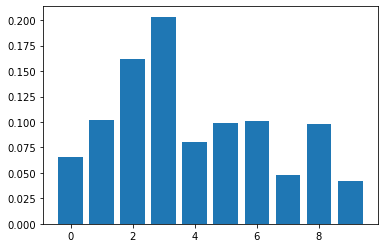

In [69]:
# Random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# define dataset
x, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# define the model
model = RandomForestClassifier()

# fit the model
model.fit(x, y)

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [70]:
# Applying a new Classification Model in Machine Learning, SVC (Support Vector Machines for Classification problems)
# The accuracy was a little bit better than the GradientBoostingClassifier.

from sklearn.svm import SVC # 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

# Standarding the predictor variables
standarder = MinMaxScaler(feature_range=(0,1))
X_norm = standarder.fit_transform(x)

# Creating the model:
model = SVC()
skfold = StratifiedKFold(n_splits=3)
result = cross_val_score(model,X_norm,y,cv =skfold, n_jobs=-1)

# Printing the accuracy:
print('Accuracy:',  result.mean())

Accuracy: 0.9109948271624918


In [71]:
# Improving SVC model with new parameters.
import numpy as np
from sklearn.model_selection import GridSearchCV

# Defining the values that will be tested in SVC:
c = np.array([1.0, 0.95, 1.05])
kernel = ['linear','poly','rbf','sigmoid']
polynomial = np.array([4,5])
gamma = ['auto','scale']
values_grid = {'C': c, 'kernel': kernel, 'degree': polynomial,'gamma': gamma}

# Creating the model:
model = SVC()

# Creating the grids
gridSVC = GridSearchCV(estimator = model, param_grid = values_grid, cv=3, n_jobs=-1)
gridSVC.fit(X_norm, y)

# Printing the best parameters
print ('The best constant value:', gridSVC.best_estimator_.C)
print ('The best kernel:', gridSVC.best_estimator_.kernel)
print ('The best polynomial degree:', gridSVC.best_estimator_.degree)
print ('The best gama:', gridSVC.best_estimator_.gamma)
print ('Accuracy:', gridSVC.best_score_)

The best constant value: 1.0
The best kernel: poly
The best polynomial degree: 4
The best gama: scale
Accuracy: 0.9240018461575348


In [72]:
# After I have improved SVC model with new parameters, I could find the real best model and its accuracy for this issue - 
# identify if a patient will die or not due to head and neck cancer according to our dataset.

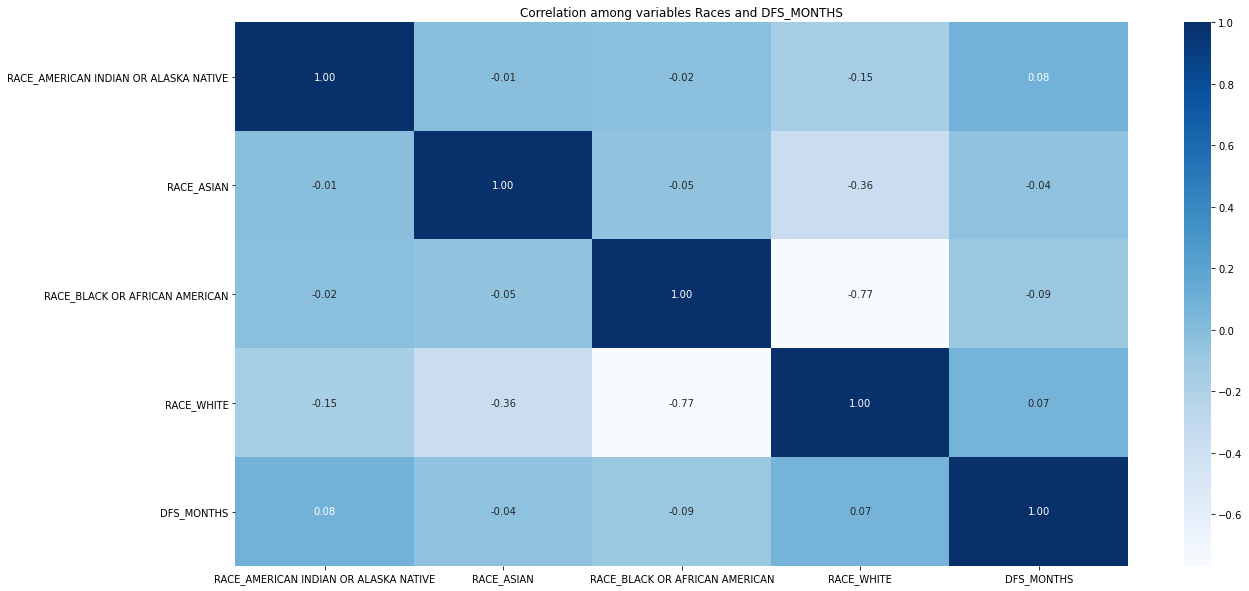

In [73]:
# The customer also asked me to make correlation among different variables as follow in order to confirm what she see in her laboratory.

# Correlation among variables Races and DFS_MONTHS
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (20.0, 10.0)

sns.heatmap(concatenated_file[['RACE_AMERICAN INDIAN OR ALASKA NATIVE','RACE_ASIAN','RACE_BLACK OR AFRICAN AMERICAN', 'RACE_WHITE','DFS_MONTHS']].corr(), annot=True, fmt='.2f', cmap='Blues')
plt.title('Correlation among variables Races and DFS_MONTHS')
plt.show()

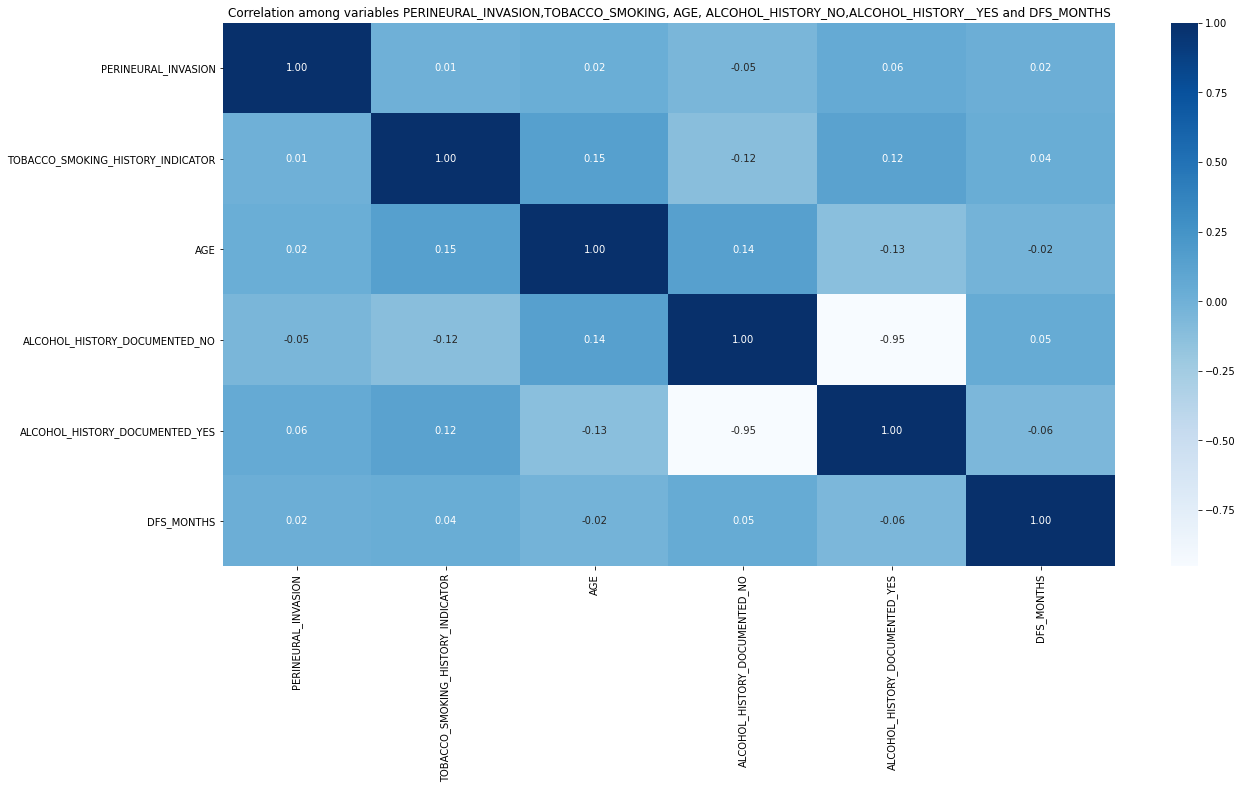

In [74]:
# Correlation among variables PERINEURAL_INVASION,TOBACCO_SMOKING, AGE, ALCOHOL_HISTORY_NO,ALCOHOL_HISTORY__YES and DFS_MONTHS

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (20.0, 10.0)

sns.heatmap(concatenated_file[['PERINEURAL_INVASION','TOBACCO_SMOKING_HISTORY_INDICATOR','AGE', 'ALCOHOL_HISTORY_DOCUMENTED_NO','ALCOHOL_HISTORY_DOCUMENTED_YES','DFS_MONTHS']].corr(), annot=True, fmt='.2f', cmap='Blues')
plt.title('Correlation among variables PERINEURAL_INVASION,TOBACCO_SMOKING, AGE, ALCOHOL_HISTORY_NO,ALCOHOL_HISTORY__YES and DFS_MONTHS')
plt.show()

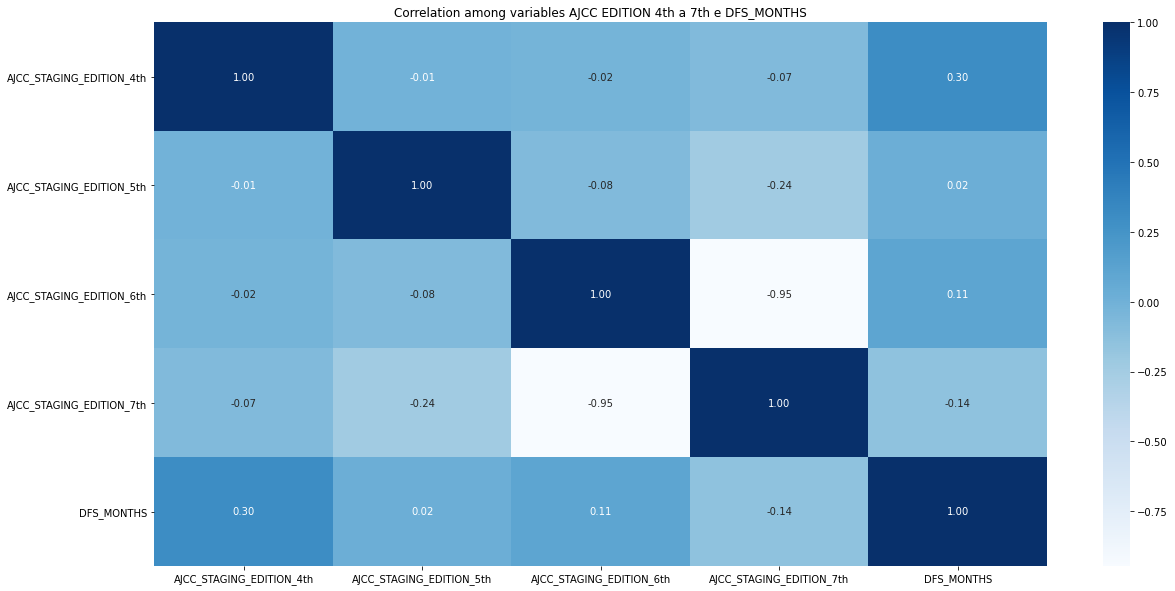

In [75]:
# Correlation among variables AJCC EDITION 4th a 7th e DFS_MONTHS

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (20.0, 10.0)

sns.heatmap(concatenated_file[['AJCC_STAGING_EDITION_4th','AJCC_STAGING_EDITION_5th','AJCC_STAGING_EDITION_6th','AJCC_STAGING_EDITION_7th',
                        'DFS_MONTHS']].corr(), annot=True, fmt='.2f', cmap='Blues')
plt.title('Correlation among variables AJCC EDITION 4th a 7th e DFS_MONTHS')
plt.show()

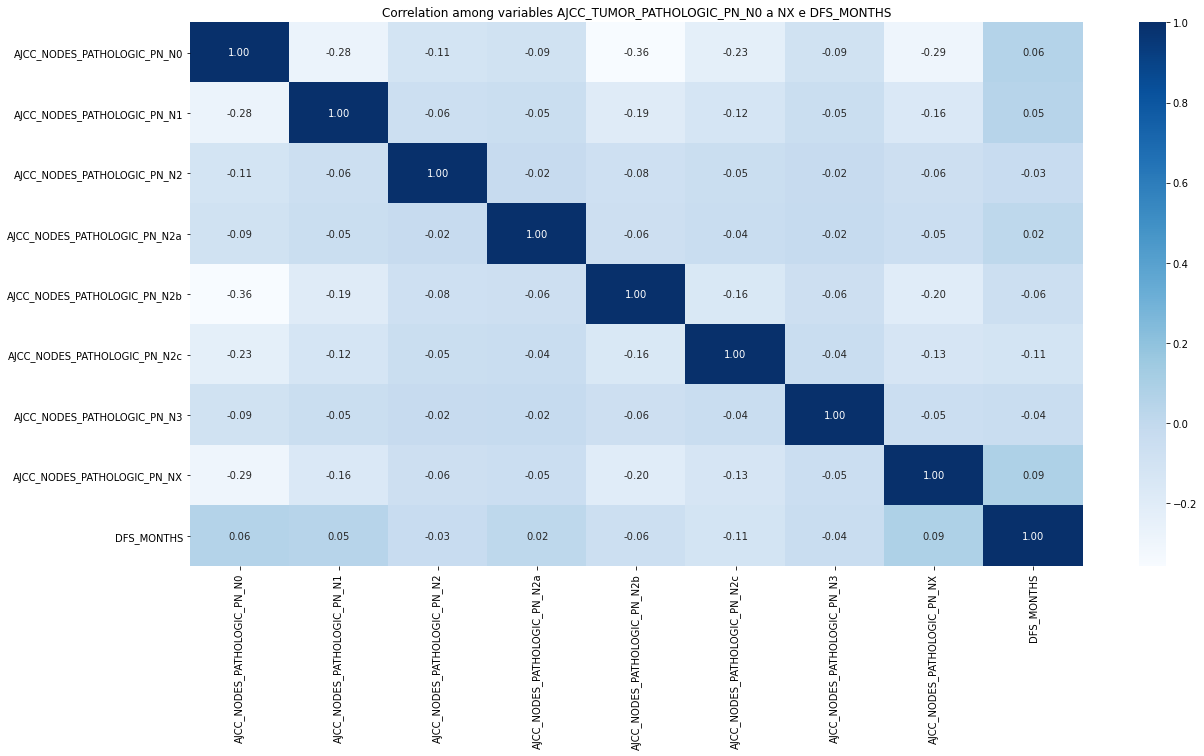

In [76]:
# Correlation among variables AJCC_TUMOR_PATHOLOGIC_PN_N0 a NX e DFS_MONTHS

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (20.0, 10.0)

sns.heatmap(concatenated_file[['AJCC_NODES_PATHOLOGIC_PN_N0','AJCC_NODES_PATHOLOGIC_PN_N1','AJCC_NODES_PATHOLOGIC_PN_N2',
                         'AJCC_NODES_PATHOLOGIC_PN_N2a','AJCC_NODES_PATHOLOGIC_PN_N2b','AJCC_NODES_PATHOLOGIC_PN_N2c',
                         'AJCC_NODES_PATHOLOGIC_PN_N3','AJCC_NODES_PATHOLOGIC_PN_NX','DFS_MONTHS']].corr(), annot=True, fmt='.2f', cmap='Blues')
plt.title('Correlation among variables AJCC_TUMOR_PATHOLOGIC_PN_N0 a NX e DFS_MONTHS')
plt.show()

In [77]:
# I hope you have enjoy it. Any questions, I am pleased to answer you asap.
# Please also feel free to give me suggestions/advices in order to improve this project. I'll appreciate so much.
# Best regards, Rodrigo Schammass #DataScientist